# Halo catalogs with splashback

This notebooks shows how to use the `Catalog` object to inspect the properties of halos with splashback radii.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Formatting
plt.rc("text", usetex=True)
plt.rc("font", size=16)

In [3]:
#This has the Catalog object
from catalog import *

In [4]:
#Select a simulation
length       = 2000 #Mpc/h comoving
scale_factor = 1.

In [5]:
#Create the Catalog object
cat = Catalog(length, scale_factor)

(0, 2.5)

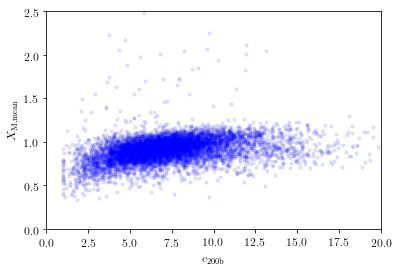

In [6]:
#Make a scatter plot of X_M_mean vs. c200b
plt.plot(cat.property("c200b"), cat.property("X_Msp_mean"), "b.", alpha=0.1)
plt.xlabel(r"$c_{\rm 200b}$")
plt.ylabel(r"$X_{\rm M,mean}$")
plt.xlim(0,20)
plt.ylim(0, 2.5)

In [7]:
print np.corrcoef(cat.property("X_Msp_mean"), cat.property("Spin"))

[[ 1.         -0.06229547]
 [-0.06229547  1.        ]]


In [8]:
names, corrs = cat.compute_correlations("M", "mean")

/Users/tmcclintock/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/tmcclintock/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [9]:
#Print the top 50 correlated variables
count = 0
for name, R in zip(names, corrs):
    if count >=50: 
        break
    if np.isnan(R):
        #Skip - this happens for irrelevant columns such as "scale"
        continue
    if "X_" in name:
        continue
    else:
        print("%20s %.4f"%(name, R))
    count += 1

    Rsp_percentile50 0.6994
            Rsp_mean 0.6973
    Rsp_percentile75 0.6819
    Rsp_percentile87 0.6563
      Halfmass_Scale -0.6331
     Acc_Rate_2*Tdyn -0.4275
     Acc_Rate_1*Tdyn -0.4220
                  rs -0.4211
           Rs_Klypin -0.4108
     Acc_Rate_100Myr -0.4075
       Acc_Rate_Inst -0.4075
    scale_of_last_MM -0.3754
      Acc_Rate_Mpeak -0.3736
     Halfmass_Radius -0.3705
   nusp_percentile50 0.3672
                Voff -0.3669
           nusp_mean 0.3553
                Xoff -0.3463
               c200b 0.3431
        Spin_Bullock -0.3290
   nusp_percentile75 0.3058
               T/|U| -0.3012
Msp_percentile87_err -0.2998
    Msp_percentile50 0.2977
            Msp_mean 0.2892
         M_pe_Diemer -0.2797
              M2500c 0.2785
Msp_percentile75_err -0.2699
   nusp_percentile87 0.2650
                Spin -0.2650
        Msp_mean_err -0.2543
              c_to_a 0.2531
    Msp_percentile75 0.2475
               Vpeak 0.2193
           Acc_Scale -0.2187


In [10]:
#Let's make a plot! Let's do a scatter plot of interesting properties
interesting_properties = ["X_Msp_mean", "X_Rsp_mean", "c200b", "Spin", "c_to_a", 
                          "Acc_Rate_1*Tdyn", "Acc_Rate_2*Tdyn"]
data = []
for i in interesting_properties:
    dat = cat.property(i)
    if "Acc_Rate" in i:
        dat = np.log(np.fabs(dat))
    data.append(dat)
data = np.array(data)
print(data.shape)

(7, 7950)


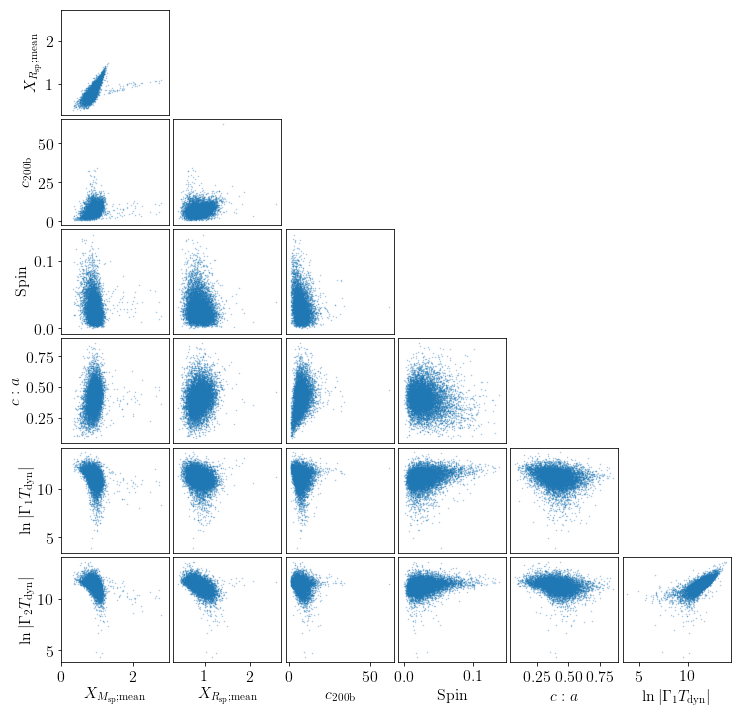

In [19]:
l = len(interesting_properties)
fig, axes = plt.subplots(nrows=l-1, ncols=l-1, figsize=(12,12))
plt.subplots_adjust(hspace=0.04, wspace=0.04)
for i in range(0, l-2):
    for j in range(i+1, l-1):
        fig.delaxes(axes[i][j])
labels = [r"$X_{M_{\rm sp};{\rm mean}}$", r"$X_{R_{\rm sp};{\rm mean}}$", r"$c_{\rm 200b}$", r"${\rm Spin}$", r"$c:a$",
          r"$\ln|\Gamma_1T_{\rm dyn}|$", r"$\ln|\Gamma_2T_{\rm dyn}|$"]

for i in range(0, l-1):
    for j in range(0, i+1):
        axes[i][j].scatter(data[j], data[i+1], marker='.', s=1, alpha=0.4)
        if j==0:
            axes[i][j].set_ylabel(labels[i+1])
            axes[i][j].set_xlim(0, 3)
        if i < l-2:
            axes[i][j].set_xticks([])
            axes[i][j].set_xticklabels([])
        if i == l-2:
            axes[i][j].set_xlabel(labels[j])
        if j > 0:
            axes[i][j].set_yticks([])
            axes[i][j].set_yticklabels([])
fig.savefig("halo_mean_correlations.png", dpi=300)